<a href="https://colab.research.google.com/github/MASTERJEDI2000/MIS-ARCHIVOS-DE-COLLAB/blob/main/Actividad5_JERC_1901607_EAG43_mar2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOSE EMILIANO RAMIREZ CAMPOS 1901607
## ANALISIS DE SUPERVIVENCIA EN PYTHON
### 13 DE MARZO DEL 2023

#### Importamos las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import ExponentialFitter
%matplotlib inline

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=28950222a70df379e07d2271a55d238972be952d990debc66f491597c0935a14
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supervivencia_examenes.xlsx to supervivencia_examenes.xlsx


In [ ]:
examenes=pd.read_excel('supervivencia_examenes.xlsx')
examenes

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


In [ ]:
examenes.shape

(17, 5)

# a) ESTADISTICAS DESCRIPTIVAS

##### TIEMPO PROMEDIO

In [ ]:
round(examenes['tiempo'].mean(),2)

107.35

##### CALIFICACION PROMEDIO

In [ ]:
round(examenes['calificación'].mean(),2)

90.71

#### *MUJERES Y HOMBRES : TIEMPO Y CALIFICACION PROMEDIO*

In [ ]:
alfa=examenes.groupby('género').mean().round(2) [['tiempo','calificación']]
alfa

,tiempo,calificación
género,,
f,108.12,93.00
m,106.67,88.67


In [ ]:
#cuad1=examenes[examenes[]]
print('Las mujeres contestaron el examen en un tiempo promedio: ',str(alfa.iloc[0,0])+' minutos' ,'con calificacion promedio de: ',str(alfa.iloc[0,1]) )
print('Las hombres contestaron el examen en un tiempo promedio: ',str(alfa.iloc[1,0])+' minutos','con calificacion promedio de: ',str(alfa.iloc[1,1]) )
if alfa.iloc[0,0]<alfa.iloc[1,0]:
    print('Las mujeres lo contestaron mas rapido')
else: 
    print('Los hombres lo contestaron mas rapido')

Las mujeres contestaron el examen en un tiempo promedio:  108.12 minutos con calificacion promedio de:  93.0
Las hombres contestaron el examen en un tiempo promedio:  106.67 minutos con calificacion promedio de:  88.67
Los hombres lo contestaron mas rapido


# b)

#### Supongo que el riesgo de entregar el examen se comporta de manera constante -> Ajusto modelo exponencial

## $ Estimador Propuesto $ $\hat{\lambda}=\frac{\sum\delta_i} {\sum t_i} $ 

In [ ]:
_lambda = examenes['examen'].sum()/examenes['tiempo'].sum()
_lambda

0.009315068493150684

In [ ]:
ex1=ExponentialFitter().fit(examenes['tiempo'],examenes['examen'])

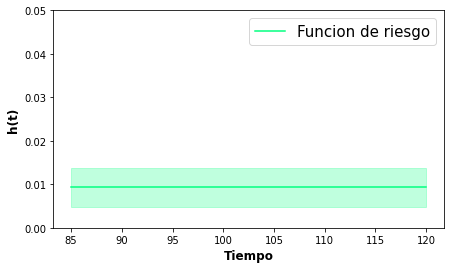

In [ ]:
plt.figure(figsize=(7,4))
ex1.plot_hazard(label='Funcion de riesgo',color='springgreen').legend(fontsize=15);
plt.ylim(0,0.05);
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");
plt.ylabel('h(t)',fontsize=12, fontweight="bold");

# C)

In [ ]:
muj=examenes[examenes['género']=='f'] #Tabla de mujeres
exmuj=ExponentialFitter().fit(muj['tiempo'],muj['examen']) #AJUSTO MODELO
homb=examenes[examenes['género']=='m'] #Tabla de hombres
exhomb=ExponentialFitter().fit(homb['tiempo'],homb['examen']) # AJUSTO MODELO

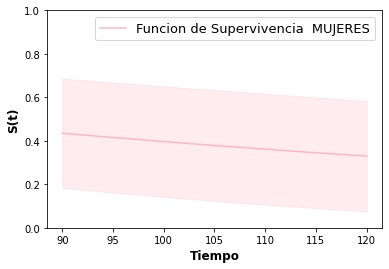

In [ ]:
exmuj.plot_survival_function(label='Funcion de Supervivencia  MUJERES',color='LIGHTpink').legend(fontsize=13);
plt.ylim(0,1);
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");
plt.ylabel('S(t)',fontsize=12, fontweight="bold");

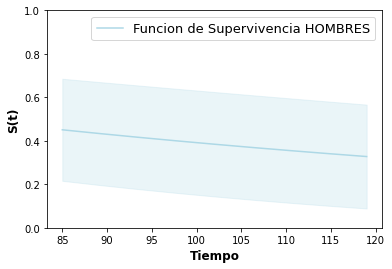

In [ ]:
exhomb.plot_survival_function(label='Funcion de Supervivencia HOMBRES',color='LIGHTblue').legend(fontsize=13);
plt.ylim(0,1);
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");
plt.ylabel('S(t)',fontsize=12, fontweight="bold");

#### EMPALMO

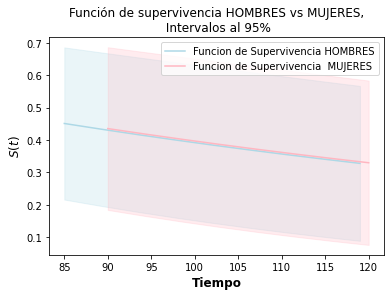

In [ ]:
exhomb.plot_survival_function(label='Funcion de Supervivencia HOMBRES',color='LIGHTblue').legend(fontsize=10);
exmuj.plot_survival_function(label='Funcion de Supervivencia  MUJERES',color='LIGHTpink').legend(fontsize=10);
plt.title('Función de supervivencia HOMBRES vs MUJERES,\n Intervalos al 95%')
plt.ylabel('$S(t)$',fontsize=12, fontweight="bold");
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");

### Graficamente observamos que las mujeres tardan un poco mas de tiempo en entregar el examen a comparación de los hombres

# d)

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
km_exa=KaplanMeierFitter().fit(examenes['tiempo'],examenes['examen']) #AJUSTO MODELO KAPLAN MEIER

In [ ]:
km_exa.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


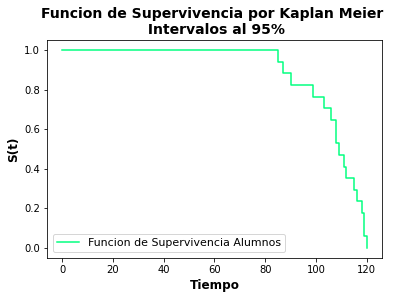

In [ ]:
km_exa.plot_survival_function(ci_show = False,label='Funcion de Supervivencia Alumnos',color='springgreen').legend(fontsize=11);
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");
plt.ylabel('S(t)',fontsize=12, fontweight="bold");
plt.title('Funcion de Supervivencia por Kaplan Meier \n Intervalos al 95%',fontsize=14,fontweight='bold');

# e)

In [ ]:
kmmuj=KaplanMeierFitter().fit(muj['tiempo'],muj['examen']) #AJUSTO MODELO KAPLAN MEIER
kmhomb=KaplanMeierFitter().fit(homb['tiempo'],homb['examen']) # AJUSTO MODELO KAPLAN MEIER

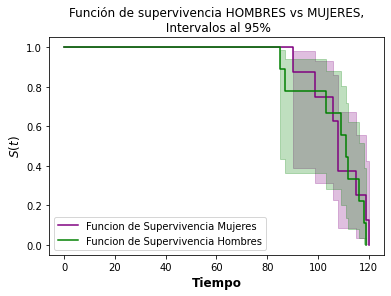

In [ ]:
kmmuj.plot_survival_function(label = 'Funcion de Supervivencia Mujeres',color='purple').legend(fontsize=10);
kmhomb.plot_survival_function(label = 'Funcion de Supervivencia Hombres',color='green').legend(fontsize=10);
plt.title('Función de supervivencia HOMBRES vs MUJERES,\n Intervalos al 95%');
plt.ylabel('$S(t)$',fontsize=12, fontweight="bold");
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");

### Graficamente observamos que las mujeres tardan un poco mas de tiempo en entregar el examen a comparación de los hombres, sin embargo, realizare una prueba de hipotesis para ver si estas funciones de supervivencia son identicas

# f)

$ Ho: Shombres(t) = Smujeres(t) $

$ Ha: Shombres(t) \neq Smujeres(t) $

In [ ]:
from lifelines.statistics import logrank_test

In [ ]:
lrt=logrank_test( homb['tiempo'],muj['tiempo']
                ,homb['examen'],muj['examen'])

In [ ]:
lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53>

p-value > $\alpha$ **NO RECHAZAMOS HO**

**Conclusion : a un 95% de confianza NO rechazamos Ho, significa que las funciones de supervivencia de hombres y mujeres son identicas**

Podemos decir que el profesor no tenia razon en decir que las mujeres contestan mas rapido el examen que los hombres

# g) y h)

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
from pandas import get_dummies

In [ ]:
# converting to binary data the gender column
examenes1=examenes
examenes1['género'] =pd.get_dummies(examenes1['género'])['m']

In [ ]:
examenes1=examenes1.drop(['id'], axis=1) #Quitamos la variable de id porque no nos ayuda

In [ ]:
examenes1

,tiempo,examen,calificación,género
0,85,1,100.0,1
1,109,1,100.0,1
2,118,1,100.0,1
3,120,1,100.0,0
4,106,1,98.0,0
5,103,1,98.0,1
6,108,1,96.0,0
7,119,1,96.0,0
8,115,1,96.0,0
9,108,1,94.0,0


In [ ]:
# Modelo Cox de riesgos Proporcionales
cph= CoxPHFitter().fit(examenes1,'tiempo','examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.40
         time fit was run = 2023-03-17 05:44:07 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
calificación   0.01       1.01       0.03            -0.05             0.06                 0.95                 1.06
género         0.29       1.33       0.61            -0.91             1.48                 0.40                 4.39

               cmp to    z    p   -log2(p)
covariate                                 
calificación     0.00 0.25 0.80       0.32
género           0.00 0.47 0.64       0.65
---
Concordance = 0.50
Partial AIC = 70.79
log-likelihood ratio test = 0.22 on 2 df
-log2(p) of ll-ratio test = 0.16

### Prueba de significancia

La prueba de significancia de la regresion es para determinar si hay una relacion lineal entre la respuesta y la variable regresora. Las hipotesis correspondientes son


$ Ho: B1=0 $  **Variables no muestran relacion**

$ Ha: B1\neq0 $ **Variables muestran relacion**

**Bajo el criterio del p-valor rechazo Ho si $ p-valor<\alpha $ donde $ \alpha = 0.05 $ es el nivel de significancia de la prueba**

Como **p-valor**>0.05, **NO** rechazo Ho , las variables **calificación** y **género** no son significativas , es decir no muestran relacion con entregar el examen

<Axes: xlabel='log(HR) (95% CI)'>

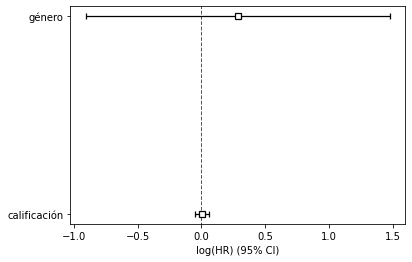

In [ ]:
cph.plot()

# i)

## MODELO COX FUNCIONES DE SUPERVIVENCIA

In [ ]:
examenes2=examenes1.drop(['examen'], axis=1) #Quitamos la variable de examen porque esta llena de 1s

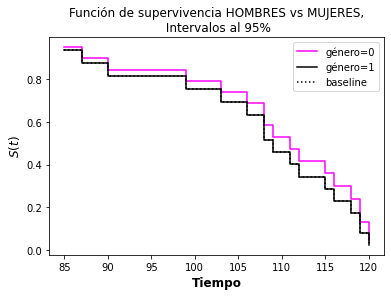

In [ ]:
cphsurv= CoxPHFitter().fit(examenes2,'tiempo','calificación')
cphsurv.plot_partial_effects_on_outcome(covariates='género',values=[0,1],color=['fuchsia','black']) #0 es mujer, 1 es hombre macho pecho peludo
plt.title('Función de supervivencia HOMBRES vs MUJERES,\n Intervalos al 95%');
plt.ylabel('$S(t)$',fontsize=12, fontweight="bold");
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");

## MODELO KAPLAN MEIER FUNCIONES DE SUPERVIVENCIA

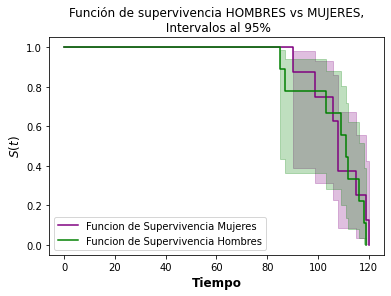

In [ ]:
kmmuj.plot_survival_function(label = 'Funcion de Supervivencia Mujeres',color='purple').legend(fontsize=10);
kmhomb.plot_survival_function(label = 'Funcion de Supervivencia Hombres',color='green').legend(fontsize=10);
plt.title('Función de supervivencia HOMBRES vs MUJERES,\n Intervalos al 95%');
plt.ylabel('$S(t)$',fontsize=12, fontweight="bold");
plt.xlabel('Tiempo',fontsize=12, fontweight="bold");

## CONCLUSION

### Podemos notar que las funciones de supervivencia en ambos modelos se comportan de la misma manera, las funciones de supervivencia de los modelos Cox y Kaplen-Meier obtienen resultados similares,aunque podemos observar que las mujeres graficamente tardan un poquito mas que los hombres en entregar el examen, realmente podemos decir que sus funciones de supervivencia en ambos generos son identicas

# j)             Justificación

### En base al modelo Cox pudimos observar que ser hombre o mujer no se relaciona significativamente con el evento de entregar el examen y de igual manera resalto que tener una alta o baja calificacion no se relaciona significativamente con entregar el examen, y en base a las graficas de las funciones de supervivencia de los modelos exponencial, cox y Kaplan Meier son meramente identicas ambas funciones, ademas de esto lo fundamento con la pruebas de hipotesis del modelo Keplen-Meier en el que tiene como resultado la aceptación de la hipotesis nula la cual nos dice que ambas funciones de supervivencia son identicas.

### Con lo anteriormente dicho puedo decir que el profesor NO tenia razon en decir que las alumnas contestan mas rapido el examen y tampoco tenia razon en decir que los que no estudiaron entregaban mas rapido el examen y obtenian menores calificaciones

# EL PROFESOR NO TENIA RAZON